## 포커 규칙 소개
- https://www.kaggle.com/c/poker-rule-induction
- Determine the poker hand of five playing cards 
- 포커를 해보지 않고 규칙을 모르는 외국인이라고 할때 과거의 데이터를 가지고 규칙을 추론하는 과정을 기계학습을 통해 이룸.
- 컴퓨터로 하여금 규칙을 생성하게 하고 포커의 결과를 분류하는 것이 목표.

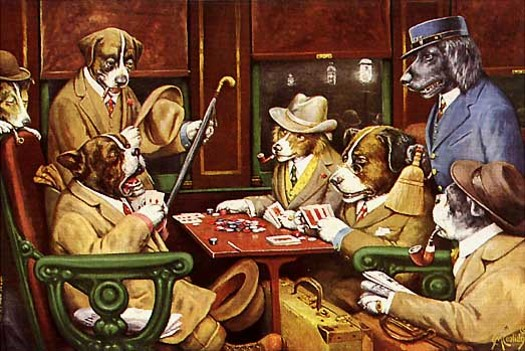

In [7]:
from IPython.display import Image
from numpy import genfromtxt, savetxt
Image(filename='data/poker.jpg')

## 포커 데이터 소개

- You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.csv. Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:
- sampleSubmission.csv, train.csv, test.csv (총 3개의 파일)

### 데이터 소개 (S1, C1, ..., S5, C5, Hands) 
- S1 “Suit of card #1”
- Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
- C1 “Rank of card #1”
- Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)
- S5 “Suit of card #5”
- C5 “Rank of card #5”

### Hands variables
- 0: Nothing in hand; not a recognized poker hand 
- 1: One pair; one pair of equal ranks within five cards
- 2: Two pairs; two pairs of equal ranks within five cards
- 3: Three of a kind; three equal ranks within five cards
- 4: Straight; five cards, sequentially ranked with no gaps
- 5: Flush; five cards with the same suit
- 6: Full house; pair + different rank three of a kind
- 7: Four of a kind; four equal ranks within five cards
- 8: Straight flush; straight + flush
- 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

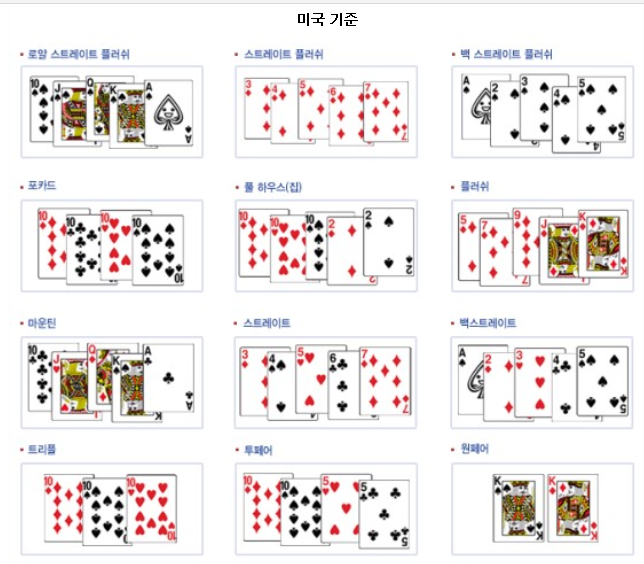

In [2]:
Image(filename='data/poker.png')

### Forum. Feature Enginerring 1

- 포커의 도메인 지식을 갖는 것이 직관적인 접근을 방해함.
- Number of card ranks that are equal
- Number of card suits that are equal
- Number of cards ranked above or below n
- Rank of ace can be 1, but also 14
- Order the hand by rank and suit
- Length of longest sequential ranks in ordered hand

### Forum. Feature Enginerring 2 - Assumption

 - They have unique suits
 - Each suit has a set of values
 - Those values have an ordering
 - From unique suits and values, can uniquely identify each card
 - Highest/Lowest card
 - If a card in one position has the same or different value as a card in another (attaching suit to show unique cards has made some things difficult)
 - If cards are adjacent to one another in ordering

In [1]:
def histogram(l):
    h={}
    for x in l:
        if x in h:
            h[x]+=1
        else:
            h[x] = 1
    return h

In [2]:
def hOfH(l, size=None):
    h = histogram(l)
    h = histogram(dict.values(h))
    result = dict.values(h)
    result.sort(reverse=True)
    if(size is not None):
        while(len(result)<size):
            result += [0]
        while len(result) > size:
            result.pop()
    return result

In [3]:
def handToFeatures(hand):
    suits = [hand[0], hand[2], hand[4], hand[6], hand[8]]
    ranks = [hand[1], hand[3], hand[5], hand[7], hand[9]]
    sh = hOfH(suits, 4)

    flush = int(sh[0] == 1 and sh[1] == 0)

    h = dict.values(histogram(ranks))
    h.sort(reverse=True)
    kind1 = h[0]
    kind2 = h[1]

    ranks.sort()
    if(1 in ranks):
        high = 1
        low = ranks[0]
        if low == 1:
            low = ranks[1]
    else:
        high = ranks[-1]
        low = ranks[0]

    normalized = [(r - low + 13)%13 for r in ranks]
    normalized.sort()
    straight = normalized[-1]==4

    return [flush, kind1, kind2, high, low, straight]

In [4]:
def main():
    #create the training & test sets, skipping the header row with [1:]
    train = genfromtxt(open('data/train.csv','r'), delimiter=',', dtype='f8')[1:]   

    test = genfromtxt(open('data/test.csv','r'), delimiter=',', dtype='f8')[1:]

    ptrain = []
    for x in train:
        y = x[-1]
        f = handToFeatures(x[:-1])
        ptrain.append(f+[y])
    
    savetxt("data/trainPrep.csv",ptrain, delimiter=',', fmt='%d,%d,%d,%d,%d,%d,%d', 
            header='flush,kind1,kind2,high,low,straight,hand', comments = '')
    
    
    ptest = []
    for x in test:
        f = handToFeatures(x[1:])
        id = x[0]
        ptest.append([id]+f)

    savetxt("data/testPrep.csv",ptest, delimiter=',', fmt='%d,%d,%d,%d,%d,%d,%d', 
            header='id,flush,kind1,kind2,high,low,straight', comments = '')

In [9]:
train = genfromtxt(open('data/train.csv','r'), delimiter=',', dtype='f8')[1:]   

In [10]:
train

array([[  4.,   9.,   2., ...,   2.,   8.,   0.],
       [  1.,   4.,   3., ...,   2.,   7.,   0.],
       [  1.,  11.,   4., ...,   2.,   1.,   2.],
       ..., 
       [  1.,   8.,   4., ...,   2.,  13.,   0.],
       [  4.,  12.,   3., ...,   4.,   6.,   0.],
       [  1.,   1.,   1., ...,   4.,   2.,   1.]])

In [11]:
ptrain = []

In [12]:
for x in train:
        y = x[-1]
        f = handToFeatures(x[:-1])
        ptrain.append(f+[y])

In [13]:
hand = train[-1]
suits = [train[-1][0], train[-1][2], train[-1][4], train[-1][6], train[-1][8]]
ranks = [train[-1][1], train[-1][3], train[-1][5], train[-1][7], train[-1][9]]

In [14]:
len(hand)

11

In [15]:
hand

array([ 1.,  1.,  1.,  3.,  1.,  7.,  1.,  2.,  4.,  2.,  1.])

In [16]:
suits

[1.0, 1.0, 1.0, 1.0, 4.0]

In [17]:
ranks

[1.0, 3.0, 7.0, 2.0, 2.0]

In [18]:
sh = hOfH(suits, 4)

In [19]:
sh

[1, 1, 0, 0]

In [20]:
h = histogram(suits) #각 조합의 갯수 (하트, 다이아, 다이아몬드, 클로버)

In [21]:
h #아 하트가 4개고 클로버가 1개네.

{1.0: 4, 4.0: 1}

In [22]:
h = histogram(dict.values(h))

In [23]:
h #조합 종류 갯수

{1: 1, 4: 1}

In [24]:
result = dict.values(h)

In [25]:
result

[1, 1]

In [26]:
result.sort(reverse=True)

In [27]:
len(result)

2

In [28]:
if(4 is not None):
        while(len(result)<4):
            result += [0]
        while len(result) > 4:
            result.pop()

In [29]:
result

[1, 1, 0, 0]

In [30]:
flush = int(result[0] == 1 and result[1] == 0) #조합의 갯수가 1개밖에 없을때는 5개가 다 동일한 조합일 경우 그러므러 플러쉬

In [31]:
flush

0

In [32]:
h = dict.values(histogram(ranks)) #이번에는 랭크(카드번호)의 고유값을 찾아보자

In [33]:
h #똑같은 랭크 숫자가 2개가 있고 나머지 3개는 다 다른 랭크 숫자.

[1, 2, 1, 1]

In [34]:
h.sort(reverse=True) 

In [35]:
h

[2, 1, 1, 1]

In [36]:
kind1 = h[0] #kind1이 2이면 원페어
kind2 = h[1] #kind2까지 2이면 투페어

In [37]:
kind1

2

In [38]:
kind2

1

In [39]:
ranks.sort()

In [40]:
ranks

[1.0, 2.0, 2.0, 3.0, 7.0]

In [41]:
if(1 in ranks):
        high = 1
        low = ranks[0]
        if low == 1:
            low = ranks[1]
else:
        high = ranks[-1]
        low = ranks[0]

In [42]:
low #high =1 이라는 것은 ACE를 뜻하므로 첫 번째 랭크의 숫자가 1이면 당연히 가장 큰 값. 이럴때는 당연히 두번 째 랭크 숫자가 가장 작은값, 첫번째 랭크 숫자가 1이 아닐경우엔 첫번째가 가장 작은 숫자겠죠.

2.0

In [43]:
high

1

In [44]:
normalized = [(r - low + 13)%13 for r in ranks] #나머지를 구하고 소팅을 해서 마지막 값이 4이면 1,2,3,4,5처럼 연속적인 숫자면 5-1이 4니깐 그럴 경우엔 스트레이트 처리

In [45]:
normalized

[12.0, 0.0, 0.0, 1.0, 5.0]

In [46]:
normalized.sort()

In [47]:
normalized

[0.0, 0.0, 1.0, 5.0, 12.0]

In [48]:
straight = normalized[-1]==4

In [50]:
straight

False

#분석 알고리즘
- SVM(Support Vector Machine) 
- 로지스틱 회귀는 입력값에 주어질 때 출력값에 대한 조건부 확률을 추정하는데 비해, 서포트 벡터 기계는 확률 추정을 하지않고 직접 부류 결과에 대한 예측을 함.
- SVM have been of the best "out of the box" clasifiers 
- Maximal margin classifier , Support Vector classifier (a soft margin classfier),Support Vector Machine

![그림참고](http://cfile23.uf.tistory.com/image/251C2E3E5530B87B01ADAB)
![그림참고](http://cfile27.uf.tistory.com/image/2360BC3B5530BA20095057)
![그림참고](http://cfile3.uf.tistory.com/image/2713CF3E55372FBF183820)

- 두개의 hyperplane들 사이의 거리가 decision boundary의 margin. 이 마진을 계산하기 위해 wx + b = 1, wx + b = -1의 식을 빼서 d = 2 / ||w|| 을 구할 수 있음. ||w|| (w의 norm) ||w||을 최소화하는 문제로 바뀌고 >=1 , <=-1 의 조건을 만족하는 w를 찾으면 문제 해결.
- Support Vector Machine는 여기에더하여 slack 을 도입하면서 어느정도 오분류를 허용하고 마진을 최대화하는 방식을 취함. 여기서 c는 훈련오차와 벌점간의 상대적 크기를 조절하는 조율 모수. 라그랑즈 승수법으로 w를 구하게 되고~ 자세한 내용은 http://vision0814.tistory.com/122

![그림참고](http://www.saedsayad.com/images/SVR_2.png)

- 커널을 이용하여 특성공간으로부터 자료를 매핑하여 비선형적인 분류를 잡아낼 수도 있다.

![그림참고](http://www.saedsayad.com/images/SVR_5.png)
![그림참고](http://www.saedsayad.com/images/SVM_kernel_1.png)

In [51]:
#!/usr/bin/python

import scipy as sp
def llfun(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll


In [52]:
#!/usr/bin/python

from sklearn.ensemble import *
from sklearn import svm
from sklearn import cross_validation
import numpy as np

def main():
    classifier = GradientBoostingClassifier
    #read in  data, parse into training and target sets
    dataset = np.genfromtxt(open('data/trainPrep.csv','r'), delimiter=',', dtype='f8')[1:]    
    target = np.array([x[-1] for x in dataset])
    train = np.array([x[:-1] for x in dataset])

    #In this case we'll use a random forest, but this could be any classifier
    cfr = classifier()

    #Simple K-Fold cross validation. 5 folds.
    cv = cross_validation.KFold(len(train), n_folds=5, shuffle=True)

    #iterate through the training and test cross validation segments and
    #run the classifier on each one, aggregating the results into a list
    results = []
    for traincv, testcv in cv:
        predicted = cfr.fit(train[traincv], target[traincv]).predict(train[testcv])
        total=len(predicted)
        correct=0.0
        for i in range(total):
            if target[testcv][i] == predicted[i]:
                correct += 1.0
        results.append(correct/total)

    #print out the mean of the cross-validated results
    print "Results: " + str( np.array(results).mean() )

if __name__=="__main__":
    main()


Results: 0.999520191923


In [54]:
import re
import os

def createNamesDatabase(*names):
    """
    >>> db = createNamesDatabase("abc", "123", "abc123", "abc_123")
    >>> "abc" in db
    True
    >>> "abc123" in db
    True
    >>> "abC123" in db
    False
    """
    result = set()
    for arg in names:
        if(isinstance(arg, str)):
           result.add(arg)
        else:
            try:
                result.add(set(arg))
            except:
                result.add(str(arg))
    return result


def addToNamesDatabase(db, *names):
    for arg in names:
        if(isinstance(arg, str)):
           db.add(arg)
        else:
            try:
                db.add(set(arg))
            except:
                db.add(str(arg))

def splitName(name, numPattern=r'[0-9]+', delimPattern=r'[-._]+'):
    parts = re.split("("+delimPattern+")", name)
    moreParts = []
    indexOfNums = []
    for part in parts:
        x = re.split("("+numPattern+")", part)
        for p in  x:
            if(re.match(numPattern, p)):
                indexOfNums.append(len(moreParts))
            moreParts.append(p)
    return moreParts, indexOfNums

def incrementName(name, numPattern=r'[0-9]+', delimPattern=r'[-._]+', numDigits=4, defaultDelim="_"):
    parts, nums = splitName(name)
    if(len(nums)==0):
        return incrementName(name + defaultDelim + ("0"*numDigits), numPattern, delimPattern, numDigits, defaultDelim)
    i = nums[-1]
    l = len(parts[i])
    parts[i] = str(int(parts[i]) + 1)
    while(len(parts[i])<l):
        parts[i] = "0" + parts[i]
    return "".join(parts)

def uniquifyName(name, db, numPattern=r'[0-9]+', delimPattern=r'[-._]+', numDigits=4, defaultDelim="_"):
    """
    >>> db = createNamesDatabase("abc", "123", "abc123", "abc_123", "xyz_123_abc")
    >>> uniquifyName("123", db)
    '124'
    >>> uniquifyName("123", db)
    '125'
    >>> uniquifyName("123", db)
    '126'
    >>> uniquifyName("127", db)
    '127'
    >>> uniquifyName("xyz_123_abc", db)
    'xyz_124_abc'
    >>> uniquifyName("abc", db)
    'abc_0001'
    """
    n = name
    while(n in db):
        n = incrementName(n)
    addToNamesDatabase(db, n)
    return n

def generateUniqueFilename(path):
    if(not os.path.exists(path)):
        return path
    base = os.path.basename(path)
    directory = os.path.dirname(path)
    root, ext = os.path.splitext(base)
    files = os.listdir(directory)
    
    if(not re.search(r'[0-9]+', root)):
        root += "_0000"
    db = createNamesDatabase()
    for f in files:
        b = os.path.basename(f)
        r, e = os.path.splitext(b)
        addToNamesDatabase(db, r)
    return os.path.join(directory, uniquifyName(root, db)+ ext)
        
                
def _test():
    import doctest
    doctest.testmod()

if __name__ == "__main__":
    _test()        


In [55]:
#!/usr/bin/python

from sklearn import svm
from numpy import genfromtxt, savetxt

def main():
    clf = svm.SVC(gamma=0.001, C=100)    

    #create the training & test sets, skipping the header row with [1:]
    dataset = genfromtxt(open('data/trainPrep.csv','r'), delimiter=',', dtype='f8')[1:]    
    target = [x[-1] for x in dataset]
    train = [x[:-1] for x in dataset]
    test = genfromtxt(open('data/testPrep.csv','r'), delimiter=',', dtype='f8')[1:]
    test =  [x[1:] for x in test]

    svc=clf.fit(train, target)

    predicted = []
    i = 1
    for x in test:
        y = clf.predict(x)
        predicted.append([i,y])
        i += 1
        
    filename = generateUniqueFilename("data/submission.csv")
    print "Generating submission: " + filename
    savetxt(filename, predicted, delimiter=',', fmt='%d,%d', 
            header='id,hand', comments = '')

if __name__=="__main__":    
    main()


Generating submission: data\submission_0000.csv
